## Now we will using Time Series Analysis(LSTM and CNN-LSTM)

## Till now we were using Cummulative rainfall.But what if we have rainfall record as a sequence i.e from a particular date to the date on which landslide occured .For making prediction on such sequence type of data LSTM and LSTM-CNN are best. 

In [1]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from numpy import array

### First let us see datset and its features.

In [2]:
df = pd.read_csv('datalandslide.csv')

In [3]:
df.head(5)

,dates,stationid,sumax,sumay,sumaz,countwx,countwy,countwz,accx,accy,...,dispz,temperature,humidity,pressure,rain,lightavg,lightavgw/o0,lightmax,forces,moisture
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.1175,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,07/08/2018,t10,0.24,0.47,3.36,4.0,4.0,4.0,0.06,0.1175,...,0.0,25.46875,82.18750,1036.346875,6.75,0.3438,5.5000,4000.0,0.045625,0.0000
3,07/09/2018,t10,0.00,0.00,0.00,0.0,0.0,0.0,0.06,0.1175,...,0.0,26.19298,83.14912,1037.604386,1761.75,6.0263,11.8448,4000.0,0.616053,5.6930
4,07/10/2018,t10,0.00,0.00,0.00,0.0,0.0,0.0,0.06,0.1175,...,0.0,25.17021,85.34043,1037.889362,652.50,3.6383,8.7692,4000.0,0.499894,6.8511


In [4]:
#removing NaN Values

df = df.drop(df.index[[0,1]])


In [5]:
df.head()

,dates,stationid,sumax,sumay,sumaz,countwx,countwy,countwz,accx,accy,...,dispz,temperature,humidity,pressure,rain,lightavg,lightavgw/o0,lightmax,forces,moisture
2,07/08/2018,t10,0.24,0.47,3.36,4.0,4.0,4.0,0.06,0.1175,...,0.000000,25.46875,82.18750,1036.346875,6.75,0.3438,5.5000,4000.0,0.045625,0.0000
3,07/09/2018,t10,0.00,0.00,0.00,0.0,0.0,0.0,0.06,0.1175,...,0.000000,26.19298,83.14912,1037.604386,1761.75,6.0263,11.8448,4000.0,0.616053,5.6930
4,07/10/2018,t10,0.00,0.00,0.00,0.0,0.0,0.0,0.06,0.1175,...,0.000000,25.17021,85.34043,1037.889362,652.50,3.6383,8.7692,4000.0,0.499894,6.8511
5,07/11/2018,t10,0.02,0.17,0.91,1.0,1.0,1.0,0.02,0.1700,...,0.004961,24.29851,87.68657,1036.857463,963.00,4.4179,8.8358,4000.0,0.475597,6.0373
6,07/12/2018,t10,0.00,0.00,0.00,0.0,0.0,0.0,0.02,0.1700,...,0.004961,24.06923,87.64615,1027.830769,254.25,145.7615,274.6232,4333.0,0.377846,31.2385


In [6]:
df.set_index('dates', inplace = True)
df.index = pd.to_datetime(df.index)

In [7]:
df.head()

,stationid,sumax,sumay,sumaz,countwx,countwy,countwz,accx,accy,accz,...,dispz,temperature,humidity,pressure,rain,lightavg,lightavgw/o0,lightmax,forces,moisture
dates,,,,,,,,,,,,,,,,,,,,,
2018-07-08,t10,0.24,0.47,3.36,4.0,4.0,4.0,0.06,0.1175,0.84,...,0.000000,25.46875,82.18750,1036.346875,6.75,0.3438,5.5000,4000.0,0.045625,0.0000
2018-07-09,t10,0.00,0.00,0.00,0.0,0.0,0.0,0.06,0.1175,0.84,...,0.000000,26.19298,83.14912,1037.604386,1761.75,6.0263,11.8448,4000.0,0.616053,5.6930
2018-07-10,t10,0.00,0.00,0.00,0.0,0.0,0.0,0.06,0.1175,0.84,...,0.000000,25.17021,85.34043,1037.889362,652.50,3.6383,8.7692,4000.0,0.499894,6.8511
2018-07-11,t10,0.02,0.17,0.91,1.0,1.0,1.0,0.02,0.1700,0.91,...,0.004961,24.29851,87.68657,1036.857463,963.00,4.4179,8.8358,4000.0,0.475597,6.0373
2018-07-12,t10,0.00,0.00,0.00,0.0,0.0,0.0,0.02,0.1700,0.91,...,0.004961,24.06923,87.64615,1027.830769,254.25,145.7615,274.6232,4333.0,0.377846,31.2385


In [8]:
#Fill the missing values

df = df.fillna(method = 'bfill')

In [9]:
df.tail(5)

,stationid,sumax,sumay,sumaz,countwx,countwy,countwz,accx,accy,accz,...,dispz,temperature,humidity,pressure,rain,lightavg,lightavgw/o0,lightmax,forces,moisture
dates,,,,,,,,,,,,,,,,,,,,,
2018-11-21,t9,0.0,0.0,0.0,0.0,0.0,0.0,0.085,0.045,0.44,...,2.732073,16.65926,58.69630,1026.797407,73577.25,2658.3185,5521.1231,47460.0,0.018148,54.4222
2018-11-22,t9,0.0,0.0,0.0,0.0,0.0,0.0,0.085,0.045,0.44,...,2.732073,15.52482,63.16312,1027.495248,65301.75,2545.1986,5521.1231,47460.0,0.017730,54.5674
2018-11-23,t9,0.0,0.0,0.0,0.0,0.0,0.0,0.085,0.045,0.44,...,2.732073,15.81560,59.21277,1029.318511,73534.50,2545.1986,5521.1231,47460.0,0.016312,54.8794
2018-11-24,t9,0.0,0.0,0.0,0.0,0.0,0.0,0.085,0.045,0.44,...,2.732073,16.58571,54.63571,1026.776357,72283.50,2563.3786,5521.1231,47460.0,0.015786,55.0286
2018-11-25,t9,0.0,0.0,0.0,0.0,0.0,0.0,0.085,0.045,0.44,...,2.732073,17.90000,49.41000,1026.771200,71799.75,3585.9300,5783.7581,47460.0,0.014700,55.3400


In [10]:
# convert charactor variable into interger
df = df.replace(['t10', 't11', 't12', 't13','t14', 't15','t6','t7','t8','t9'], [1, 2, 3, 4,5,6,7,8,9,10])


In [11]:
df

,stationid,sumax,sumay,sumaz,countwx,countwy,countwz,accx,accy,accz,...,dispz,temperature,humidity,pressure,rain,lightavg,lightavgw/o0,lightmax,forces,moisture
dates,,,,,,,,,,,,,,,,,,,,,
2018-07-08,1,0.24,0.47,3.36,4.0,4.0,4.0,0.060,0.1175,0.84,...,0.000000,25.46875,82.18750,1036.346875,6.75,0.3438,5.5000,4000.0,0.045625,0.0000
2018-07-09,1,0.00,0.00,0.00,0.0,0.0,0.0,0.060,0.1175,0.84,...,0.000000,26.19298,83.14912,1037.604386,1761.75,6.0263,11.8448,4000.0,0.616053,5.6930
2018-07-10,1,0.00,0.00,0.00,0.0,0.0,0.0,0.060,0.1175,0.84,...,0.000000,25.17021,85.34043,1037.889362,652.50,3.6383,8.7692,4000.0,0.499894,6.8511
2018-07-11,1,0.02,0.17,0.91,1.0,1.0,1.0,0.020,0.1700,0.91,...,0.004961,24.29851,87.68657,1036.857463,963.00,4.4179,8.8358,4000.0,0.475597,6.0373
2018-07-12,1,0.00,0.00,0.00,0.0,0.0,0.0,0.020,0.1700,0.91,...,0.004961,24.06923,87.64615,1027.830769,254.25,145.7615,274.6232,4333.0,0.377846,31.2385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-21,10,0.00,0.00,0.00,0.0,0.0,0.0,0.085,0.0450,0.44,...,2.732073,16.65926,58.69630,1026.797407,73577.25,2658.3185,5521.1231,47460.0,0.018148,54.4222
2018-11-22,10,0.00,0.00,0.00,0.0,0.0,0.0,0.085,0.0450,0.44,...,2.732073,15.52482,63.16312,1027.495248,65301.75,2545.1986,5521.1231,47460.0,0.017730,54.5674
2018-11-23,10,0.00,0.00,0.00,0.0,0.0,0.0,0.085,0.0450,0.44,...,2.732073,15.81560,59.21277,1029.318511,73534.50,2545.1986,5521.1231,47460.0,0.016312,54.8794


### We had displacement in X,Y and Z direction.We are replacing it with total displacement

In [12]:
# d = sqrt{(x1)^2 + (y1)^2 + (z1)^2}
df['total_disp'] = np.sqrt(df['dispx']*df['dispx'] + df['dispy']*df['dispy'] + df['dispz']*df['dispz'])

In [13]:
# Deleting dispx,dispy and dispz

In [14]:
del df['dispx']
del df['dispy']
del df['dispz']

In [15]:
df.head()

,stationid,sumax,sumay,sumaz,countwx,countwy,countwz,accx,accy,accz,...,temperature,humidity,pressure,rain,lightavg,lightavgw/o0,lightmax,forces,moisture,total_disp
dates,,,,,,,,,,,,,,,,,,,,,
2018-07-08,1,0.24,0.47,3.36,4.0,4.0,4.0,0.06,0.1175,0.84,...,25.46875,82.18750,1036.346875,6.75,0.3438,5.5000,4000.0,0.045625,0.0000,0.000000
2018-07-09,1,0.00,0.00,0.00,0.0,0.0,0.0,0.06,0.1175,0.84,...,26.19298,83.14912,1037.604386,1761.75,6.0263,11.8448,4000.0,0.616053,5.6930,0.000000
2018-07-10,1,0.00,0.00,0.00,0.0,0.0,0.0,0.06,0.1175,0.84,...,25.17021,85.34043,1037.889362,652.50,3.6383,8.7692,4000.0,0.499894,6.8511,0.000000
2018-07-11,1,0.02,0.17,0.91,1.0,1.0,1.0,0.02,0.1700,0.91,...,24.29851,87.68657,1036.857463,963.00,4.4179,8.8358,4000.0,0.475597,6.0373,0.006819
2018-07-12,1,0.00,0.00,0.00,0.0,0.0,0.0,0.02,0.1700,0.91,...,24.06923,87.64615,1027.830769,254.25,145.7615,274.6232,4333.0,0.377846,31.2385,0.006819


### Now here we will normalize the datset not in range of (0,1) but in range of that particular min using max and min

In [16]:
# Normalization of dataset
mx = df.max()
mn = df.min()
dataset = (df-mn)/(mx-mn)

In [17]:
dataset.corr()

,stationid,sumax,sumay,sumaz,countwx,countwy,countwz,accx,accy,accz,...,temperature,humidity,pressure,rain,lightavg,lightavgw/o0,lightmax,forces,moisture,total_disp
stationid,1.000000,0.027804,0.021011,0.019076,0.056984,0.054715,0.061445,-0.018134,-0.063140,-0.080104,...,-0.056319,-0.039479,0.077474,0.469651,0.127633,0.173624,-0.096850,-0.140197,0.633221,0.445275
sumax,0.027804,1.000000,0.989326,0.958065,0.590519,0.591794,0.588352,0.169272,0.205971,0.303310,...,-0.019733,-0.046339,-0.183295,-0.017989,-0.025156,-0.027615,-0.045110,0.010302,-0.030884,-0.003710
sumay,0.021011,0.989326,1.000000,0.984946,0.574472,0.575953,0.575769,0.122588,0.165866,0.319146,...,-0.026486,-0.042112,-0.193804,-0.017693,-0.025056,-0.025947,-0.036758,0.010299,-0.039755,-0.011647
sumaz,0.019076,0.958065,0.984946,1.000000,0.561018,0.562391,0.564893,0.056268,0.101446,0.334074,...,-0.027598,-0.036685,-0.199721,-0.010539,-0.017468,-0.017967,-0.026881,0.014042,-0.034492,-0.008979
countwx,0.056984,0.590519,0.574472,0.561018,1.000000,0.999446,0.991249,0.019228,0.038502,0.123832,...,-0.022353,-0.087627,-0.051460,-0.071340,-0.043024,-0.034443,-0.062489,-0.001662,-0.029437,-0.000399
countwy,0.054715,0.591794,0.575953,0.562391,0.999446,1.000000,0.990651,0.019418,0.039011,0.124860,...,-0.023363,-0.088069,-0.051471,-0.070713,-0.043284,-0.034491,-0.062269,-0.001411,-0.031302,-0.000772
countwz,0.061445,0.588352,0.575769,0.564893,0.991249,0.990651,1.000000,0.036693,0.055964,0.126832,...,-0.030193,-0.086688,-0.054157,-0.070465,-0.042384,-0.033554,-0.061931,-0.014904,-0.029056,0.003939
accx,-0.018134,0.169272,0.122588,0.056268,0.019228,0.019418,0.036693,1.000000,0.984852,0.136071,...,-0.086566,-0.144676,0.054059,-0.016624,-0.026729,-0.027947,-0.085935,-0.001368,-0.039225,0.145947
accy,-0.063140,0.205971,0.165866,0.101446,0.038502,0.039011,0.055964,0.984852,1.000000,0.259450,...,-0.068718,-0.136287,0.018471,-0.055913,-0.067823,-0.072545,-0.104697,-0.009404,-0.073682,0.115756
accz,-0.080104,0.303310,0.319146,0.334074,0.123832,0.124860,0.126832,0.136071,0.259450,1.000000,...,0.115307,-0.074381,-0.106357,0.019954,0.009054,0.008533,0.010925,0.096875,0.014607,0.059100


### Again converting into numpy so that operations can be done

In [18]:
# Convert into Matrix
dataset = dataset.to_numpy()

In [19]:
dataset.shape

(963, 23)

## Now unlike the other regression models here we dont divide into input and target variables ,rather in LSTM portion of dataset is feed into X and by learning through it it tried to predict y 

In [21]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
# find the end of this pattern
        end_ix = i + n_steps
# check if we are beyond the dataset
        if end_ix > len(sequences):
            break
# gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [22]:
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)

(961, 3, 22) (961,)


In [23]:
x_train = X[:700]
y_train = y[:700]
x_test = X[700:]
y_test = y[700:]

In [24]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(700, 3, 22)
(700,)
(261, 3, 22)
(261,)


In [25]:
# Importing all the required Libraries
import os

import matplotlib.pyplot as plt
import numpy as np

from pandas import read_csv
from pandas import concat
from pandas import DataFrame
from keras.layers import Input
from numpy import array
from keras.models import Model
from keras.layers import Dense
from keras.layers.merge import concatenate
from keras.models import Sequential
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten, Dropout
from keras.layers import LSTM

from sklearn.metrics import mean_squared_error
from keras.models import load_model
from scipy import stats
import csv as csv
import copy

## LSTM

## Here we have units=32 wjich we have taken as almost the double of input features ,activation finction is tanh as it is required in LSTM ,optimizer is adam and loss is calculated using mean error.

In [26]:
n_features = x_train.shape[2]
model = Sequential()

model.add(LSTM(32, activation = 'tanh',return_sequences = False, input_shape = (n_steps,n_features)))

#model.add(LSTM(16, activation = 'tanh',return_sequences = False))
#model.add(Dropout(0.3))
model.add(Dense(32,activation = 'tanh'))
model.add(Dense(32,activation = 'tanh'))
model.add(Dense(32,activation = 'tanh'))
model.add(Dense(32,activation = 'tanh'))
model.add(Dense(32,activation = 'tanh'))
model.add(Dense(32,activation = 'tanh'))
#model.add(Dropout(0.3))

model.add(Dense(1,activation = 'tanh'))
model.compile(loss = 'mse', optimizer = 'adam')

## we have taken 128 as epoch- number of times datset is passed through model and batchsize=5 -the number of training set present in a single batch

In [27]:
history = model.fit(x_train, y_train, epochs = 128, batch_size = 5, verbose = 1, shuffle = False)


Epoch 1/128
140/140 [==============================] - 15s 2ms/step - loss: 0.0193
Epoch 2/128
140/140 [==============================] - 0s 2ms/step - loss: 0.0262
Epoch 3/128
140/140 [==============================] - 0s 2ms/step - loss: 0.0345
Epoch 4/128
140/140 [==============================] - 0s 2ms/step - loss: 0.0338
Epoch 5/128
140/140 [==============================] - 0s 2ms/step - loss: 0.0304
Epoch 6/128
140/140 [==============================] - 0s 2ms/step - loss: 0.0256
Epoch 7/128
140/140 [==============================] - 0s 2ms/step - loss: 0.0296
Epoch 8/128
140/140 [==============================] - 0s 2ms/step - loss: 0.0287
Epoch 9/128
140/140 [==============================] - 0s 2ms/step - loss: 0.0364
Epoch 10/128
140/140 [==============================] - 0s 2ms/step - loss: 0.0313
Epoch 11/128
140/140 [==============================] - 0s 2ms/step - loss: 0.0319
Epoch 12/128
140/140 [==============================] - 0s 2ms/step - loss: 0.0397
Epoch 13/128

In [28]:
y_pred = model.predict(x_test)

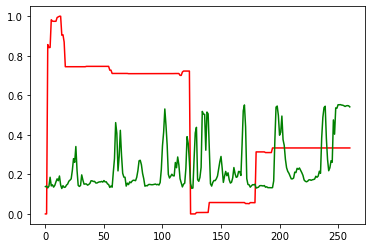

In [29]:
plt.plot(y_test,c='r')
plt.plot(y_pred,c='g') 
plt.show()

In [30]:
model.save('Landslide_CNN.h5')

In [31]:
from keras.models import load_model

model = load_model('Landslide_CNN.h5')
scores = model.evaluate(x_test, y_test)


9/9 [==============================] - 1s 1ms/step - loss: 0.1708


In [32]:
print((100-(scores*100)))

82.9187348484993


## We are getting a accuracy of 82.9 percent which is not bad

##  CNN

In [34]:
# Now training a CNN as well so we can use LSTM and a CNN together

In [35]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(700, 3, 22)
(700,)
(261, 3, 22)
(261,)


In [36]:
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import array

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import ConvLSTM2D
 
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from numpy import array
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling1D

In [37]:
n_features = x_train.shape[2]
model = Sequential()

model.add(Conv1D(filters=128, kernel_size=3, activation='tanh',padding = 'same', input_shape=(n_steps,n_features)))
model.add(Dropout(0.3))
model.add(MaxPooling1D(pool_size=2,padding = 'same'))
model.add(Flatten())
model.add(Dense(16, activation = 'tanh'))

model.add(Dense(1,activation = 'tanh'))
model.compile(optimizer='adam', loss= 'mse')



history = model.fit(x_train, y_train, epochs = 64, batch_size = 10, verbose = 0, shuffle = False)


In [38]:
y_pred = model.predict(x_test)

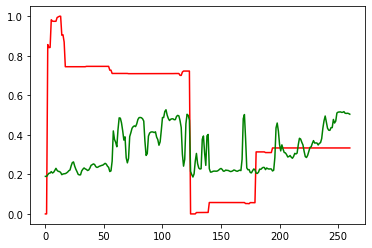

In [39]:
plt.plot(y_test,c='r')
plt.plot(y_pred,c='g') 
plt.show()

In [40]:
model.save('Landslide_CNN1.h5')

In [41]:
from keras.models import load_model

model = load_model('Landslide_CNN1.h5')
scores = model.evaluate(x_test, y_test)


9/9 [==============================] - 0s 991us/step - loss: 0.1076


## CNN - LSTM

In [43]:
n_features = 1
n_length = 22


x_train = x_train.reshape((x_train.shape[0],n_steps,n_length,n_features))
x_test = x_test.reshape((x_test.shape[0],n_steps,n_length,n_features))

In [44]:
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=32, kernel_size=5, padding ='same',activation='tanh'),input_shape=(None,n_length,n_features)))
model.add(TimeDistributed(Flatten()))

model.add(LSTM(64,activation = 'tanh'))
#model.add(Dropout(0.3))

model.add(Dense(1,activation = 'tanh'))
model.compile(optimizer = 'adam', loss = 'mse')




history = model.fit(x_train, y_train, epochs = 64, batch_size = 15, verbose = 0, shuffle = False)


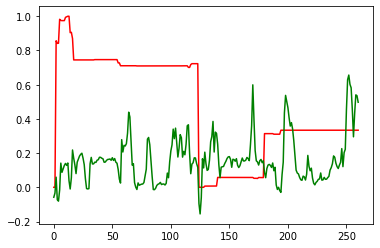

In [45]:
y_pred = model.predict(x_test)
plt.plot(y_test,c='r')
plt.plot(y_pred,c='g') 
plt.show()

In [46]:
model.save('Landslide_CNN-LSTM.h5')

In [48]:
from keras.models import load_model

model = load_model('Landslide_CNN-LSTM.h5')
scores = model.evaluate(x_test, y_test)
print((100-(scores*100)))


9/9 [==============================] - 0s 1ms/step - loss: 0.2074
79.26406264305115


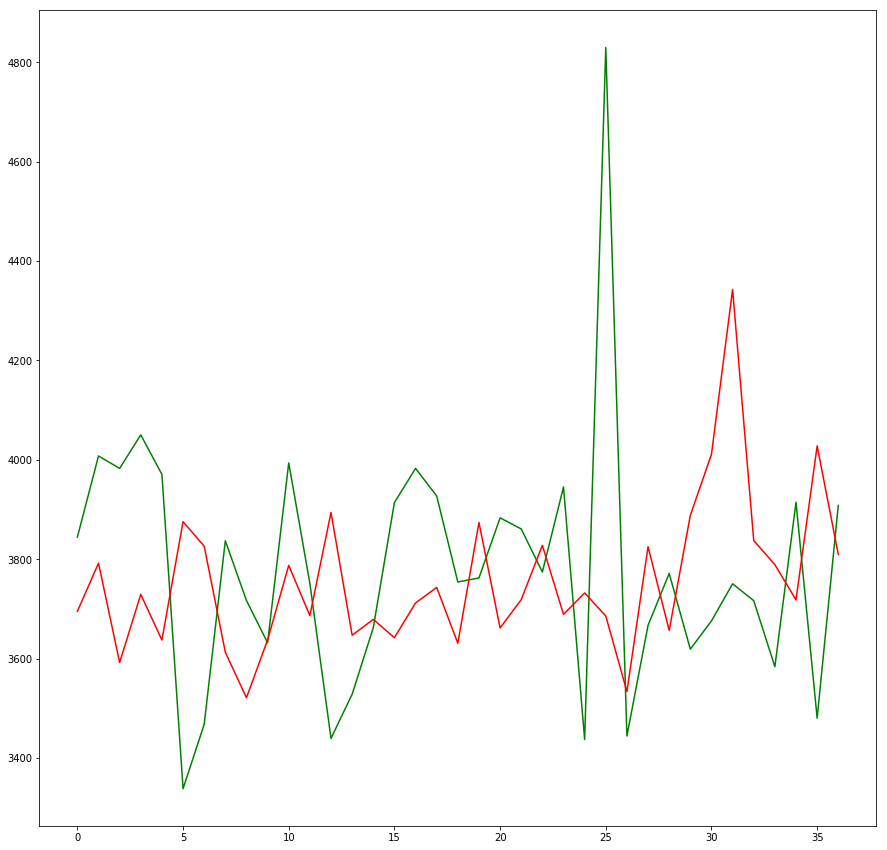

## Conv LSTM

In [ ]:
_features = 1
n_length = 22


x_train = x_train.reshape((x_train.shape[0],n_steps,1,n_length,n_features))
x_test = x_test.reshape((x_test.shape[0],n_steps,1,n_length,n_features))

In [ ]:
model = Sequential()
model.add(ConvLSTM2D(filters=128, kernel_size=(1,5),input_shape=(n_steps, 1, n_length, n_features)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='tanh'))
model.compile(loss='mse', optimizer='adam')



history = model.fit(x_train, y_train, epochs = 128, batch_size = 20, verbose = 0, shuffle = False)


In [ ]:
y_pred = model.predict(x_test)
plt.plot(y_test,c='r')
plt.plot(y_pred,c='g') 
plt.show()

In [ ]:
model.save('Landslide_Conv-LSTM.h5')

In [ ]:
from keras.models import load_model

model = load_model('Landslide_Conv-LSTM.h5')
scores = model.evaluate(x_test, y_test)


In [ ]:
print(history.history['loss'])
print(history.history['accuracy'])

In [ ]:
print(history.history['val_loss'])